<a href="https://colab.research.google.com/github/kriteeka123/Keystroke-Data-Analysis/blob/main/Keystroke_Data_Analysis_gcolab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##**CYBER SECURITY**
###*KEYSTROKE DATA ANALYSIS*

#**K Nearest Neighbour Model for User Authentication based on Keystroke Dynamics (KNN)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
\
from sklearn.neighbors import KNeighborsClassifier

###LOAD AND EXPLORE DATA

In [ ]:
data = pd.read_csv("KeystrokeData.csv")
data.head()

,User,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,...,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return,Target
0,Nikhil,0.119,0.272,0.153,0.103,0.208,0.105,0.103,0.288,0.185,...,0.328,0.225,0.135,0.264,0.129,0.111,0.311,0.200,0.112,Genuine
1,Nikhil,0.119,0.272,0.153,0.103,0.216,0.113,0.103,0.287,0.184,...,0.312,0.209,0.151,0.272,0.121,0.110,0.304,0.194,0.151,Genuine
2,Nikhil,0.127,0.352,0.225,0.143,0.240,0.097,0.143,0.344,0.201,...,0.297,0.154,0.150,0.263,0.113,0.127,0.304,0.177,0.127,Genuine
3,Nikhil,0.122,0.315,0.193,0.127,0.200,0.073,0.111,0.400,0.289,...,0.200,0.089,0.143,0.240,0.097,0.159,0.176,0.017,0.087,Genuine
4,Nikhil,0.143,0.232,0.089,0.119,0.208,0.089,0.127,0.264,0.137,...,0.184,0.041,0.151,0.224,0.073,0.206,0.192,-0.014,0.119,Genuine


In [ ]:
data.columns

Index(['User', 'H.period', 'DD.period.t', 'UD.period.t', 'H.t', 'DD.t.i',
       'UD.t.i', 'H.i', 'DD.i.e', 'UD.i.e', 'H.e', 'DD.e.five', 'UD.e.five',
       'H.five', 'DD.five.Shift.r', 'UD.five.Shift.r', 'H.Shift.r',
       'DD.Shift.r.o', 'UD.Shift.r.o', 'H.o', 'DD.o.a', 'UD.o.a', 'H.a',
       'DD.a.n', 'UD.a.n', 'H.n', 'DD.n.l', 'UD.n.l', 'H.l', 'DD.l.Return',
       'UD.l.Return', 'H.Return', 'Target'],
      dtype='object')

##DATA VISUALIZATION

<ipython-input-75-518cdf285940>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='User',data=data,palette='hls',saturation=0.5,linewidth=5)


<Axes: xlabel='User', ylabel='count'>

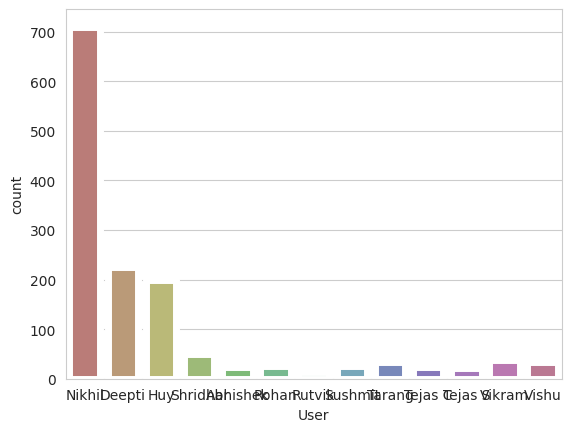

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='User',data=data,palette='hls',saturation=0.5,linewidth=5)

###Split data into train and test data

In [ ]:
train, test = train_test_split(data, test_size = 0.2)
features = list(data.columns[1:32])
X_train = train[features]
y_train = train['Target']
X_test = test[features]
y_test = test['Target']

<ipython-input-77-1919886d5fe0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target',data=train,palette='Set2',linewidth=2,saturation=0.5)


<Axes: xlabel='Target', ylabel='count'>

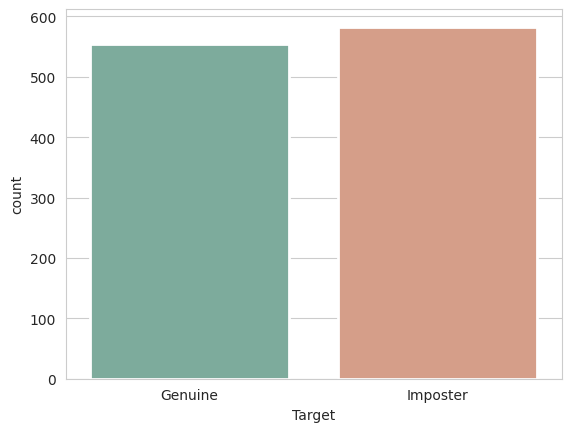

In [ ]:
sns.countplot(x='Target',data=train,palette='Set2',linewidth=2,saturation=0.5)

###Train model with training data

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

KNeighborsClassifier(n_jobs=1)

In [ ]:
y_test.count()

284

In [ ]:
#user1_data = np.array([[100, 50], [90, 60], [80, 55], [95, 58], [105, 53]])
#user2_data = np.array([[105, 55], [85, 62], [70, 52], [100, 57], [110, 60]])

# Labels for the data (0 for user1, 1 for user2)
#user1_labels = np.zeros(user1_data.shape[0])
#user2_labels = np.ones(user2_data.shape[0])

# Combine the data and labels for training
#X_train = np.vstack((user1_data, user2_data))
#y_train = np.hstack((user1_labels, user2_labels))

# Create a KNN classifier with k=8
knn_classifier = KNeighborsClassifier(n_neighbors=8)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Train the KNN classifier
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=8)

In [ ]:
y_pred = knn_classifier.predict(X_test)
from sklearn.metrics import accuracy_score



# Sample data for a new user for authentication
new_user_data = np.array([[95, 56], [110, 62], [85, 58], [92, 54], [105, 60]])



###Predict Results

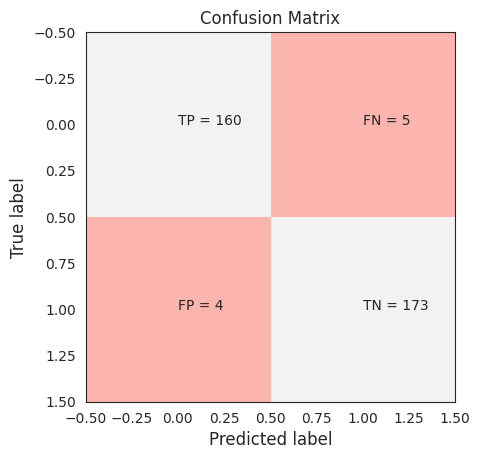

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix # Import confusion_matrix

pred = knn.predict(X_test)
come = confusion_matrix(y_test,pred)
sns.heatmap(come,
            annot=True,
            fmt='g',
            xticklabels=['Genuine','Imposter'],
            yticklabels=['Genuine','Imposter'])
sns.set_style('white')
plt.clf()
plt.imshow(come, interpolation='nearest', cmap=plt.cm.Pastel1)
plt.title('Confusion Matrix',fontsize = 12)
plt.ylabel('True label',fontsize=12)
plt.xlabel('Predicted label',fontsize=12)
s = [['TP','FN'], ['FP', 'TN']]
for k in range(2):
    for n in range(2):
        plt.text(n,k, str(s[k][n])+" = "+str(come[k][n]))
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

     Genuine       0.98      0.97      0.97       165
    Imposter       0.97      0.98      0.97       177

    accuracy                           0.97       342
   macro avg       0.97      0.97      0.97       342
weighted avg       0.97      0.97      0.97       342



In [ ]:
model_accuracy = metrics.accuracy_score(y_test, pred)
print('Accuracy of Model is : ',model_accuracy*100)

Accuracy of Model is :  97.36842105263158


In [ ]:
error_rate = []

for i in range(1,50):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

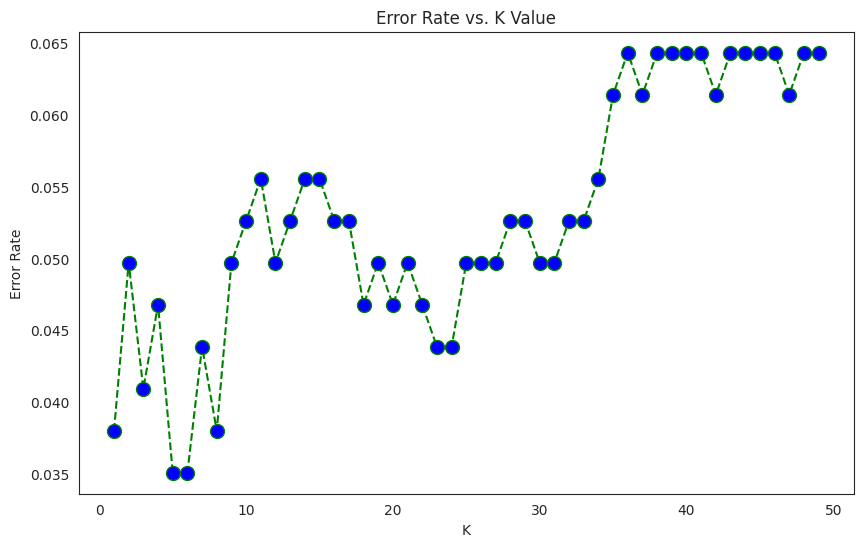

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
error_rate = []

# Will take some time
for i in range(1,60):
    train, test = train_test_split(data, test_size = 0.2, random_state=i)
    features = list(data.columns[1:32])
    X = data[features]
    X_train = train[features]
    y_train = train['Target']
    X_test = test[features]
    y_test = test['Target']
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

(array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07]),
 [Text(0, 0.01, '0.01'),
  Text(0, 0.02, '0.02'),
  Text(0, 0.03, '0.03'),
  Text(0, 0.04, '0.04'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.060000000000000005, '0.06'),
  Text(0, 0.06999999999999999, '0.07')])

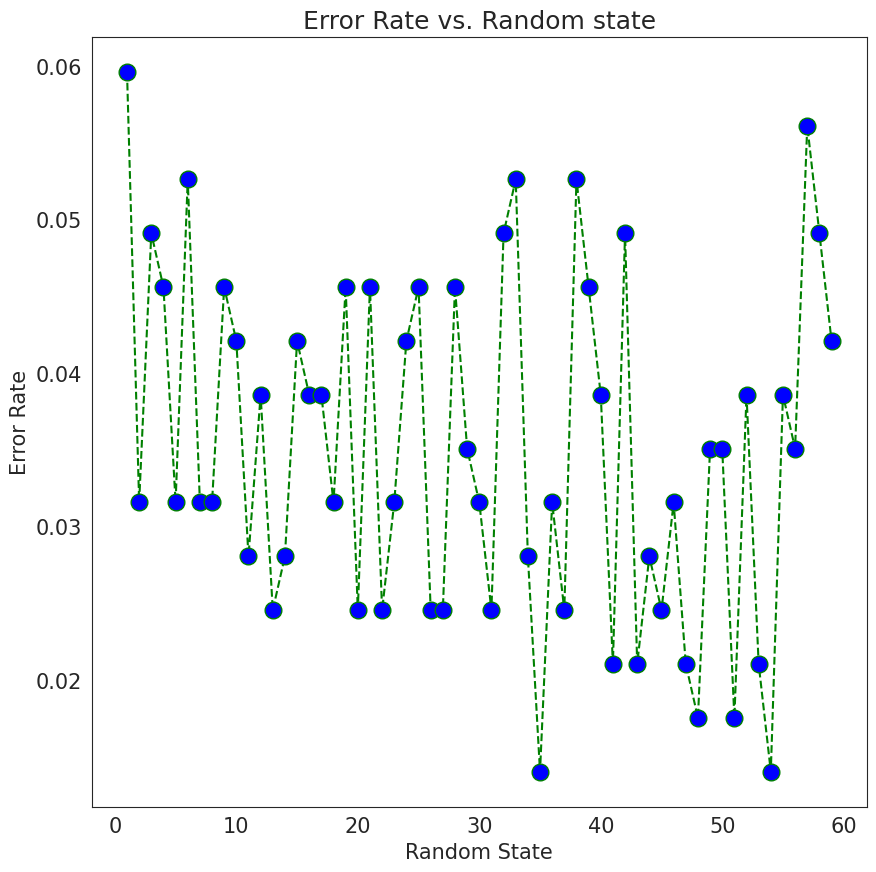

In [ ]:
ax =plt.figure(figsize=(10,10))
plt.plot(range(1,60),error_rate,color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=12,)
plt.title('Error Rate vs. Random state',fontsize=18)
plt.xlabel('Random State',fontsize=15)
plt.ylabel('Error Rate',fontsize=15)
# plt.axis([1,70,0.1,])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [ ]:
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [ ]:
C_prange = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
accuracy = []

for i in C_prange:

    train, test = train_test_split(data, test_size = i,random_state = 38)
    features = list(data.columns[1:32])
    X = data[features]
    y =data['Target']
    X_train = train[features]
    y_train = train['Target']
    X_test = test[features]
    y_test = test['Target']
    knn = KNeighborsClassifier(n_neighbors=8)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    model_accuracy = metrics.accuracy_score(y_test,pred)
    accuracy.append(model_accuracy)

Text(0, 0.5, 'Accuracy')

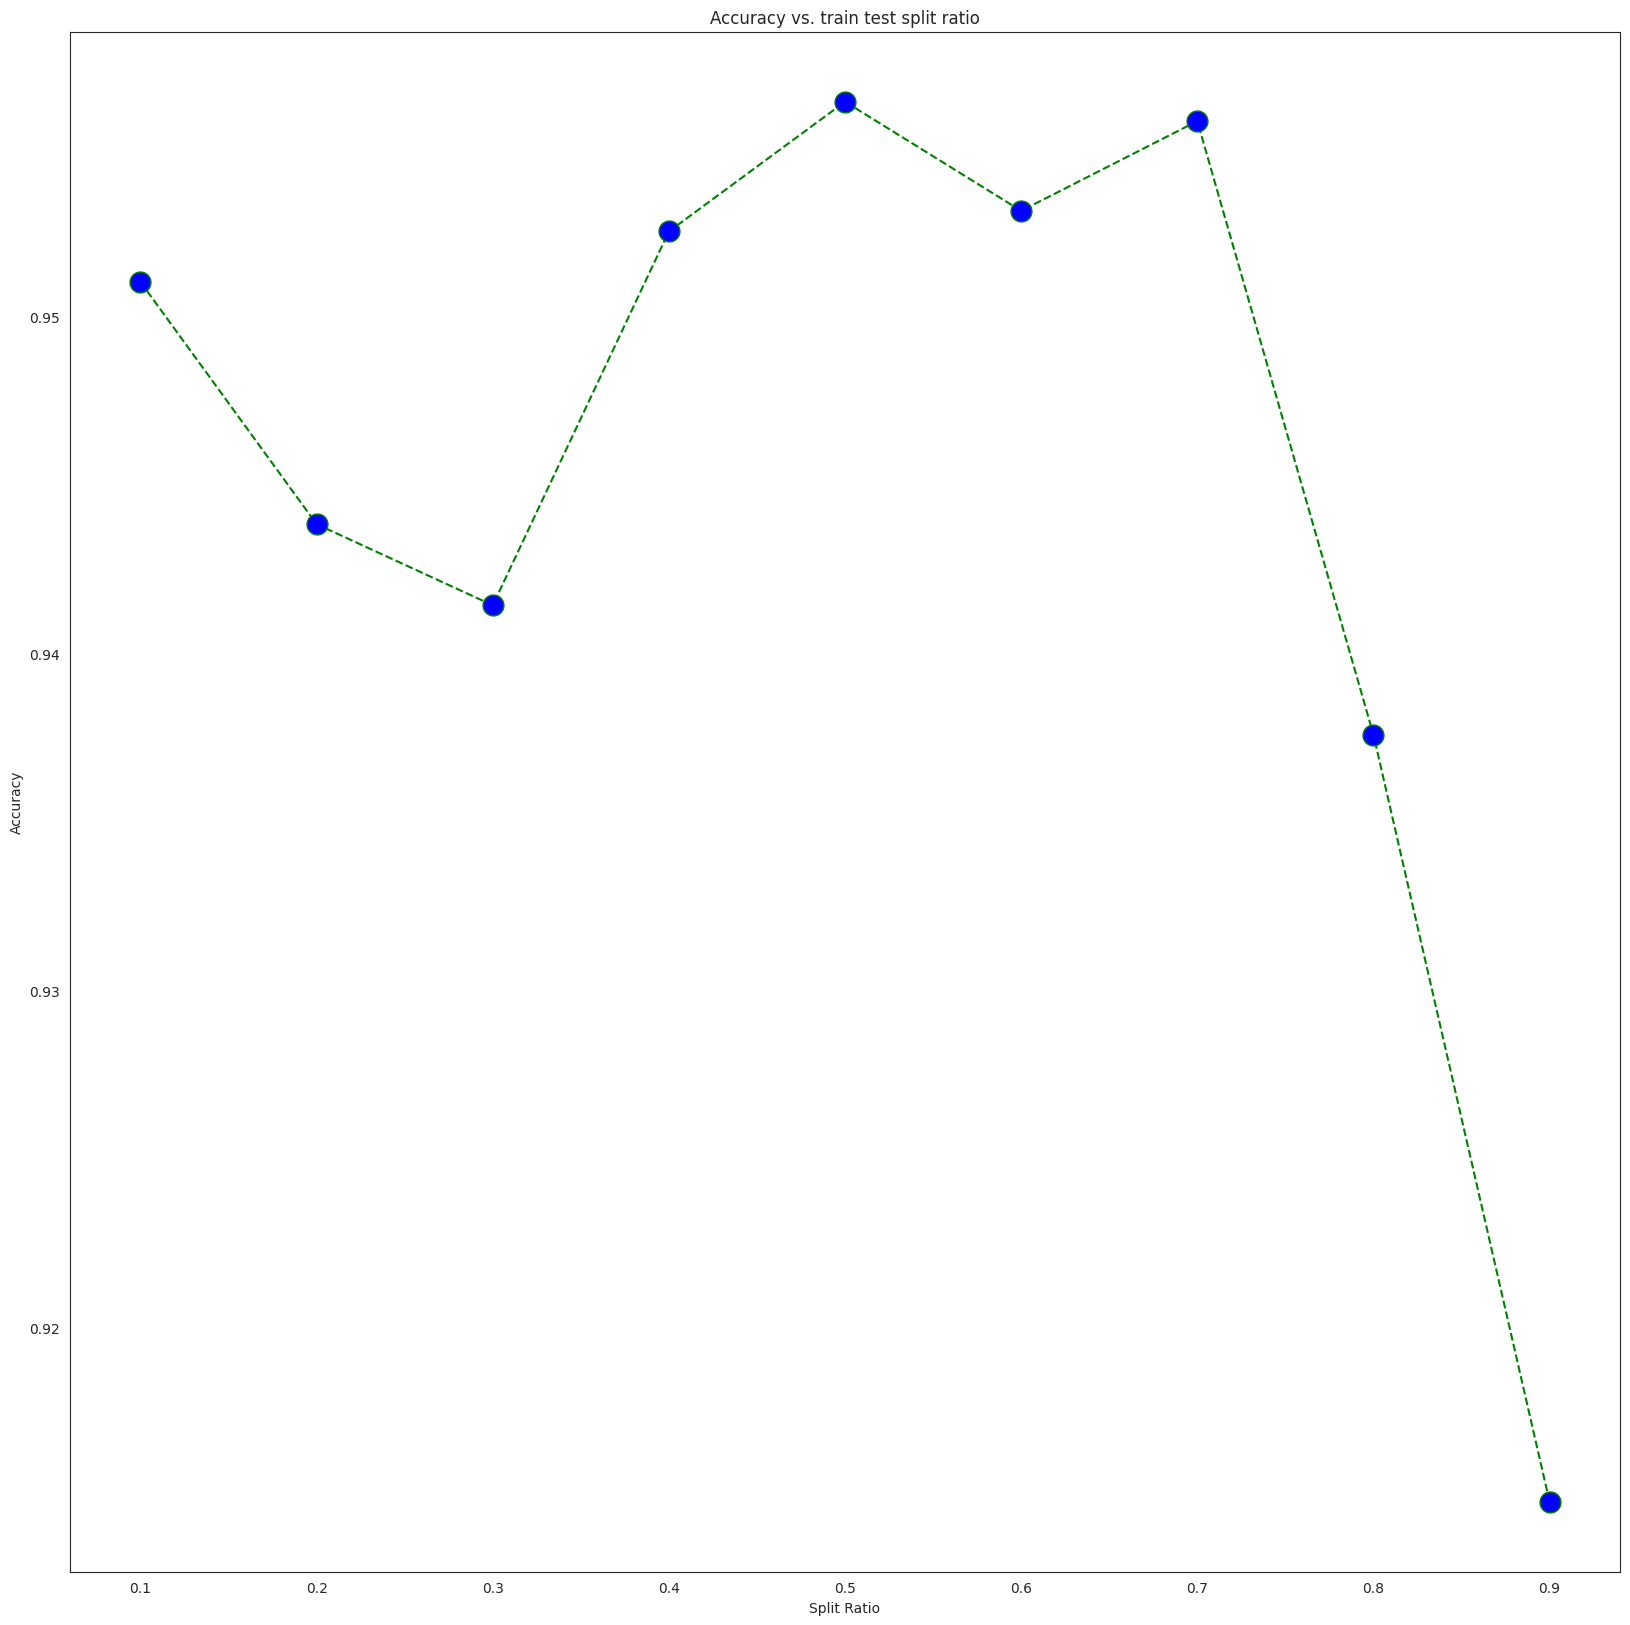

In [ ]:
ax =plt.figure(figsize=(20,20))
plt.plot(C_prange,accuracy,color='green', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=15)
plt.title('Accuracy vs. train test split ratio')
plt.xlabel('Split Ratio')
plt.ylabel('Accuracy')

In [ ]:
data = pd.read_csv("KeystrokeData.csv")
train, test = train_test_split(data, test_size = 0.2, random_state=338)
features = list(data.columns[1:32])


X_train = train[features]
y_train = train['Target']
X_test = test[features]
y_test = test['Target']
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

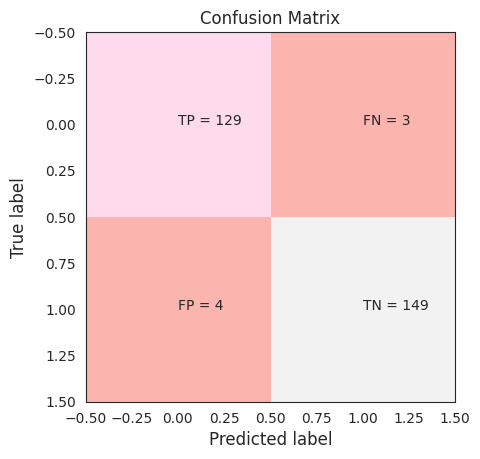

In [ ]:
pred = knn.predict(X_test)
cm = confusion_matrix(y_test,pred)
#print(confusion_matrix(y_test,pred))
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Genuine','Imposter'],yticklabels=['Genuine','Imposter']),
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
plt.title('Confusion Matrix',fontsize = 12)
plt.ylabel('True label',fontsize=12)
plt.xlabel('Predicted label',fontsize=12)
s = [['TP','FN'], ['FP', 'TN']]
for k in range(2):
    for n in range(2):
        plt.text(n,k, str(s[k][n])+" = "+str(cm[k][n]))
plt.show()

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

     Genuine       0.97      0.98      0.97       132
    Imposter       0.98      0.97      0.98       153

    accuracy                           0.98       285
   macro avg       0.98      0.98      0.98       285
weighted avg       0.98      0.98      0.98       285



In [ ]:
model_accuracy = metrics.accuracy_score(y_test, pred)
print('Accuracy of Model is : ',model_accuracy*100)

Accuracy of Model is :  97.36842105263158


#**ANALYZING KEYSTROKE DATA USING NEURAL NETWORKS**

### IMPORT REQUIRED LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
#tf.test.gpu_device _name().
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.python .client import device_lib
device_lib.list_local_devices()


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10867038831083524775
 xla_global_id: -1]

###LOADING DATASET

In [ ]:
data = pd.read_csv("/content/KeystrokeData.csv")

In [ ]:
data.head()

,User,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,...,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return,Target
0,Nikhil,0.119,0.272,0.153,0.103,0.208,0.105,0.103,0.288,0.185,...,0.328,0.225,0.135,0.264,0.129,0.111,0.311,0.200,0.112,Genuine
1,Nikhil,0.119,0.272,0.153,0.103,0.216,0.113,0.103,0.287,0.184,...,0.312,0.209,0.151,0.272,0.121,0.110,0.304,0.194,0.151,Genuine
2,Nikhil,0.127,0.352,0.225,0.143,0.240,0.097,0.143,0.344,0.201,...,0.297,0.154,0.150,0.263,0.113,0.127,0.304,0.177,0.127,Genuine
3,Nikhil,0.122,0.315,0.193,0.127,0.200,0.073,0.111,0.400,0.289,...,0.200,0.089,0.143,0.240,0.097,0.159,0.176,0.017,0.087,Genuine
4,Nikhil,0.143,0.232,0.089,0.119,0.208,0.089,0.127,0.264,0.137,...,0.184,0.041,0.151,0.224,0.073,0.206,0.192,-0.014,0.119,Genuine


In [ ]:
data.head(5)

,User,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,...,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return,Target
0,Nikhil,0.119,0.272,0.153,0.103,0.208,0.105,0.103,0.288,0.185,...,0.328,0.225,0.135,0.264,0.129,0.111,0.311,0.200,0.112,Genuine
1,Nikhil,0.119,0.272,0.153,0.103,0.216,0.113,0.103,0.287,0.184,...,0.312,0.209,0.151,0.272,0.121,0.110,0.304,0.194,0.151,Genuine
2,Nikhil,0.127,0.352,0.225,0.143,0.240,0.097,0.143,0.344,0.201,...,0.297,0.154,0.150,0.263,0.113,0.127,0.304,0.177,0.127,Genuine
3,Nikhil,0.122,0.315,0.193,0.127,0.200,0.073,0.111,0.400,0.289,...,0.200,0.089,0.143,0.240,0.097,0.159,0.176,0.017,0.087,Genuine
4,Nikhil,0.143,0.232,0.089,0.119,0.208,0.089,0.127,0.264,0.137,...,0.184,0.041,0.151,0.224,0.073,0.206,0.192,-0.014,0.119,Genuine


<Axes: xlabel='Target'>

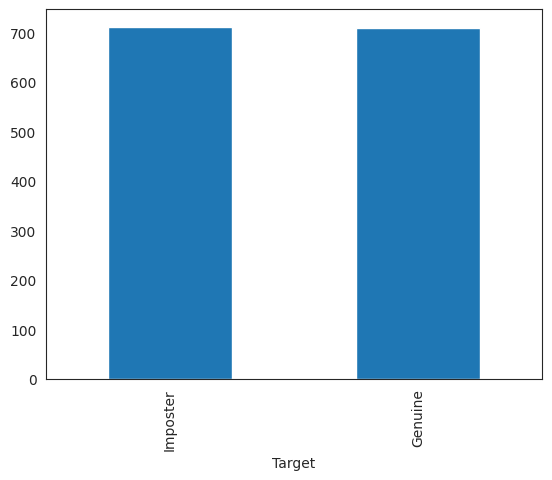

In [ ]:
import seaborn as sns
data['Target'].value_counts().plot(kind='bar')

## PREPARING DATA FOR MODELLING

In [ ]:
predictors= data.iloc[:,1:32]
response= data.iloc[:,32]

In [ ]:
predictors.head()

,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,H.e,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,0.119,0.272,0.153,0.103,0.208,0.105,0.103,0.288,0.185,0.151,...,0.103,0.328,0.225,0.135,0.264,0.129,0.111,0.311,0.200,0.112
1,0.119,0.272,0.153,0.103,0.216,0.113,0.103,0.287,0.184,0.136,...,0.103,0.312,0.209,0.151,0.272,0.121,0.110,0.304,0.194,0.151
2,0.127,0.352,0.225,0.143,0.240,0.097,0.143,0.344,0.201,0.175,...,0.143,0.297,0.154,0.150,0.263,0.113,0.127,0.304,0.177,0.127
3,0.122,0.315,0.193,0.127,0.200,0.073,0.111,0.400,0.289,0.127,...,0.111,0.200,0.089,0.143,0.240,0.097,0.159,0.176,0.017,0.087
4,0.143,0.232,0.089,0.119,0.208,0.089,0.127,0.264,0.137,0.143,...,0.143,0.184,0.041,0.151,0.224,0.073,0.206,0.192,-0.014,0.119


In [ ]:
#One hot encoding of the target  column
from sklearn.preprocessing import LabelEncoder
LE1 = LabelEncoder()
response = np.array(LE1.fit_transform(response))

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(predictors,response,test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(1137, 31) (1137,)
(285, 31) (285,)


## TRAINING THE NEURAL NETWORK MODEL
###There are two ways to create Keras Model: Sequential and Functional.
###The Sequential API allows you to create models layer-by-layer

In [ ]:
import tensorflow as tf
import torch
from torch import nn
import random
from tensorflow import keras

In [ ]:
X_train = tf.convert_to_tensor(X_train,dtype = tf.float64)
X_test=tf.convert_to_tensor(X_test,dtype = tf.float64)
y_train=tf.convert_to_tensor(y_train,dtype = tf.float64)
y_test=tf.convert_to_tensor(y_test,dtype = tf.float64)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
valid_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))



In [ ]:
ann=tf.keras.models.Sequential()
# adding the first hidden layer
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
#adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
# adding the output layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
#compling the neural network
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])





In [ ]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
ann.fit(X_train,y_train,batch_size=32,epochs = 100)

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5214 - loss: 0.7245
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6399 - loss: 0.5841
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8403 - loss: 0.4481
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9058 - loss: 0.3592
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9175 - loss: 0.2876
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9423 - loss: 0.2211
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9564 - loss: 0.1820
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9587 - loss: 0.1535
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9682 - loss: 0.1257
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9771 - loss: 0.1039
Epoch 11/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9734 - loss: 0.1015
Epoch 12/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

#**Logistic Regression Model for User Authentication based on Keystroke Dynamics**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

##Load Data

In [ ]:
data = pd.read_csv("/content/KeystrokeData.csv")

In [ ]:
data.head()

,User,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,...,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return,Target
0,Nikhil,0.119,0.272,0.153,0.103,0.208,0.105,0.103,0.288,0.185,...,0.328,0.225,0.135,0.264,0.129,0.111,0.311,0.200,0.112,Genuine
1,Nikhil,0.119,0.272,0.153,0.103,0.216,0.113,0.103,0.287,0.184,...,0.312,0.209,0.151,0.272,0.121,0.110,0.304,0.194,0.151,Genuine
2,Nikhil,0.127,0.352,0.225,0.143,0.240,0.097,0.143,0.344,0.201,...,0.297,0.154,0.150,0.263,0.113,0.127,0.304,0.177,0.127,Genuine
3,Nikhil,0.122,0.315,0.193,0.127,0.200,0.073,0.111,0.400,0.289,...,0.200,0.089,0.143,0.240,0.097,0.159,0.176,0.017,0.087,Genuine
4,Nikhil,0.143,0.232,0.089,0.119,0.208,0.089,0.127,0.264,0.137,...,0.184,0.041,0.151,0.224,0.073,0.206,0.192,-0.014,0.119,Genuine


In [ ]:
data.columns

Index(['User', 'H.period', 'DD.period.t', 'UD.period.t', 'H.t', 'DD.t.i',
       'UD.t.i', 'H.i', 'DD.i.e', 'UD.i.e', 'H.e', 'DD.e.five', 'UD.e.five',
       'H.five', 'DD.five.Shift.r', 'UD.five.Shift.r', 'H.Shift.r',
       'DD.Shift.r.o', 'UD.Shift.r.o', 'H.o', 'DD.o.a', 'UD.o.a', 'H.a',
       'DD.a.n', 'UD.a.n', 'H.n', 'DD.n.l', 'UD.n.l', 'H.l', 'DD.l.Return',
       'UD.l.Return', 'H.Return', 'Target'],
      dtype='object')

##Data Visualization

<ipython-input-96-4a7f2d6fe512>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target',data=data,palette='Set2',linewidth=2,saturation=0.5)


<Axes: xlabel='Target', ylabel='count'>

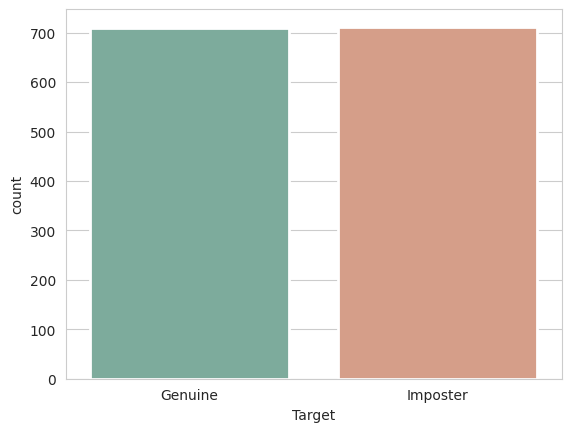

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Target',data=data,palette='Set2',linewidth=2,saturation=0.5)

##Split data into train and test data

In [ ]:
train, test = train_test_split(data, test_size = 0.2)
features = list(data.columns[1:32])
X = data[features]
y =data['Target']
X_train = train[features]
y_train = train['Target']
X_test = test[features]
y_test = test['Target']

##Create logistic regression model and train it with training data

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

##Predict results

In [ ]:
pred = logmodel.predict(X_test)

In [ ]:
df = pd.DataFrame(y_test)
se = pd.Series(pred)

tempdf = pd.DataFrame(logmodel.predict_proba(X_test))
se1 = pd.Series(tempdf[0])
ew = se1.round(decimals=2)
df['Genuine probability'] = ew.values
se2 = pd.Series(tempdf[1])
ew1 = se2.round(decimals=3)
df['Imposter probability'] = ew1.values
df['Predictions'] = se.values

In [ ]:
df

,Target,Genuine probability,Imposter probability,Predictions
1382,Imposter,0.18,0.825,Imposter
351,Genuine,0.90,0.105,Genuine
860,Imposter,0.06,0.942,Imposter
229,Genuine,0.81,0.194,Genuine
663,Genuine,0.95,0.048,Genuine
...,...,...,...,...
888,Imposter,0.08,0.922,Imposter
232,Genuine,0.90,0.099,Genuine
1293,Imposter,0.06,0.940,Imposter
1049,Imposter,0.27,0.731,Imposter


##Check Performance of Model

In [ ]:
model_accuracy = metrics.accuracy_score(y_test,pred)

In [ ]:
y_test.value_counts()

,count
Target,
Imposter,153
Genuine,132


In [ ]:
cm = confusion_matrix(y_test,pred)
print(confusion_matrix(y_test,pred))

[[124   8]
 [  8 145]]


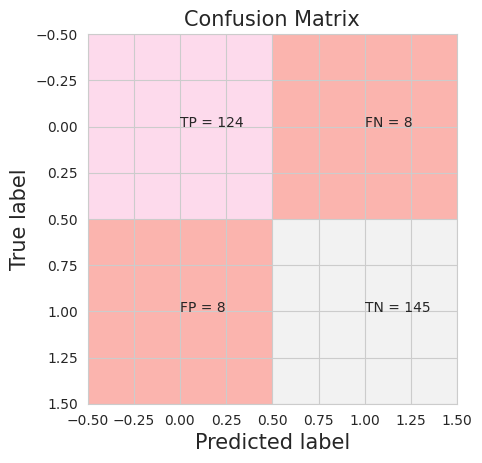

In [ ]:
#sns.set_style('white')
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Genuine','Imposter'],yticklabels=['Genuine','Imposter']),
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
plt.title('Confusion Matrix',fontsize = 15)
plt.ylabel('True label',fontsize=15)
plt.xlabel('Predicted label',fontsize=15)
s = [['TP','FN'], ['FP', 'TN']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

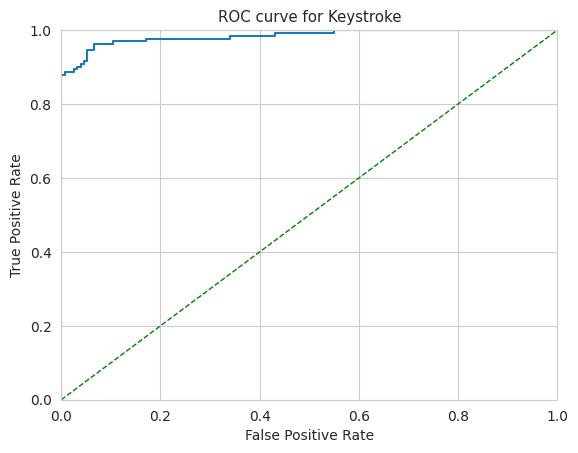

In [ ]:
probs = logmodel.predict_proba(X_test)
preds = probs[:,0]
fpr, tpr,threshold= metrics.roc_curve(y_test, preds,pos_label='Genuine')
plt.figure()
lw = 1
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
plt.rcParams['font.size'] = 9
plt.title('ROC curve for Keystroke')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
roc_auc= metrics.auc(fpr,tpr)

In [ ]:
print("Accuracy of Model is: ", model_accuracy*100)
print()
print("Mis-Classification Rate of Model is: ",(1-model_accuracy)*100)
print()
print("Area Under Curve: ",roc_auc*100)

Accuracy of Model is:  94.38596491228071

Mis-Classification Rate of Model is:  5.6140350877192935

Area Under Curve:  98.42047930283225


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

     Genuine       0.94      0.94      0.94       132
    Imposter       0.95      0.95      0.95       153

    accuracy                           0.94       285
   macro avg       0.94      0.94      0.94       285
weighted avg       0.94      0.94      0.94       285



##Parameter Tuning

In [ ]:
error_rate = []

# Will take some time
for i in range(1,80):
    train, test = train_test_split(data, test_size = 0.2, random_state=i)
    features = list(data.columns[1:32])
    X = data[features]
    X_train = train[features]
    y_train = train['Target']
    X_test = test[features]
    y_test = test['Target']
    logmodel = LogisticRegression()

    logmodel.fit(X_train,y_train)
    pred = logmodel.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

(array([0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
 [Text(0, 0.02, '0.02'),
  Text(0, 0.03, '0.03'),
  Text(0, 0.04, '0.04'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.06, '0.06'),
  Text(0, 0.07, '0.07'),
  Text(0, 0.08, '0.08'),
  Text(0, 0.09000000000000001, '0.09'),
  Text(0, 0.1, '0.10')])

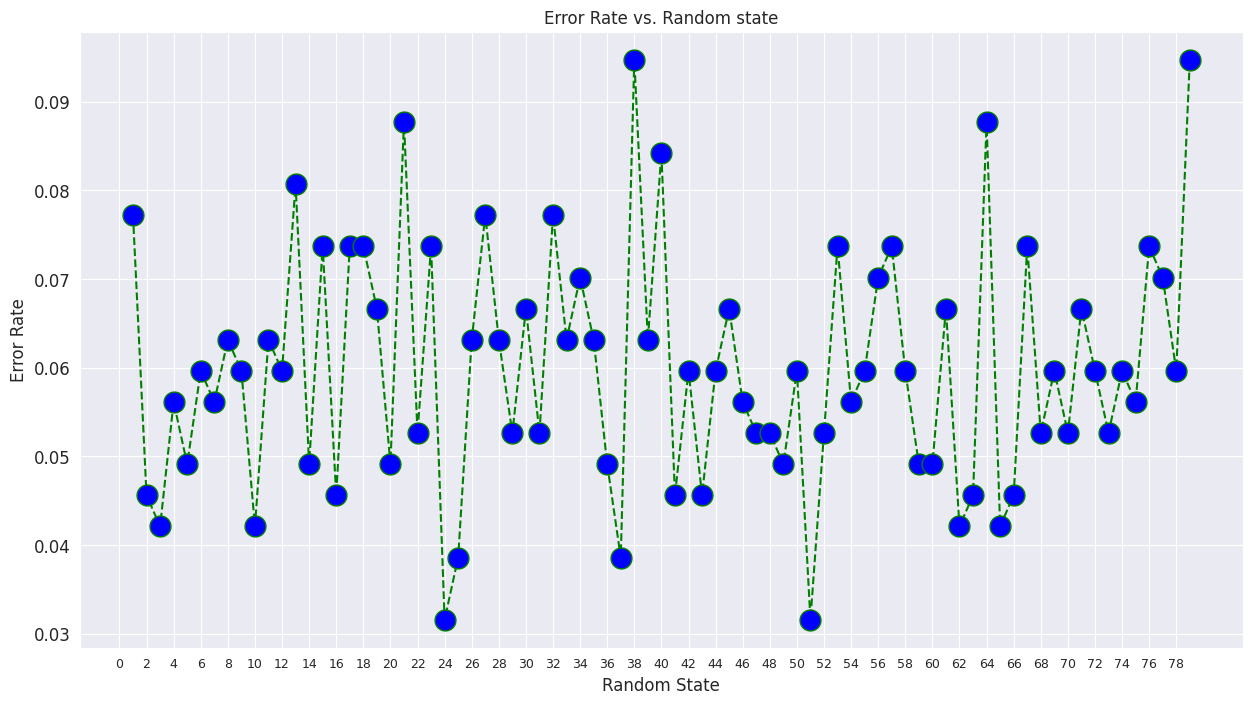

In [ ]:
sns.set_style('darkgrid')

ax =plt.figure(figsize=(15,8)).add_subplot(1, 1, 1)
plt.plot(range(1,80),error_rate,color='green', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=15,)

plt.title('Error Rate vs. Random state',fontsize=12)
plt.xlabel('Random State',fontsize=12)
plt.ylabel('Error Rate',fontsize=12)
major_ticks = np.arange(0, 80, 2)
minor_ticks = np.arange(0, 80, 1)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
plt.xticks(fontsize=9)
plt.yticks(fontsize=12)

In [ ]:
C_param_range = [0.001,0.01,0.1,1,10,100,1000]
accuracy = []

for i in C_param_range:

    train, test = train_test_split(data, test_size = 0.2,random_state = 13)
    features = list(data.columns[1:32])
    X = data[features]
    y =data['Target']
    X_train = train[features]
    y_train = train['Target']
    X_test = test[features]
    y_test = test['Target']
    logmodel = LogisticRegression(C=i)
    logmodel.fit(X_train,y_train)
    pred = logmodel.predict(X_test)
    model_accuracy = metrics.accuracy_score(y_test,pred)
    accuracy.append(model_accuracy)

Text(0, 0.5, 'Accuracy')

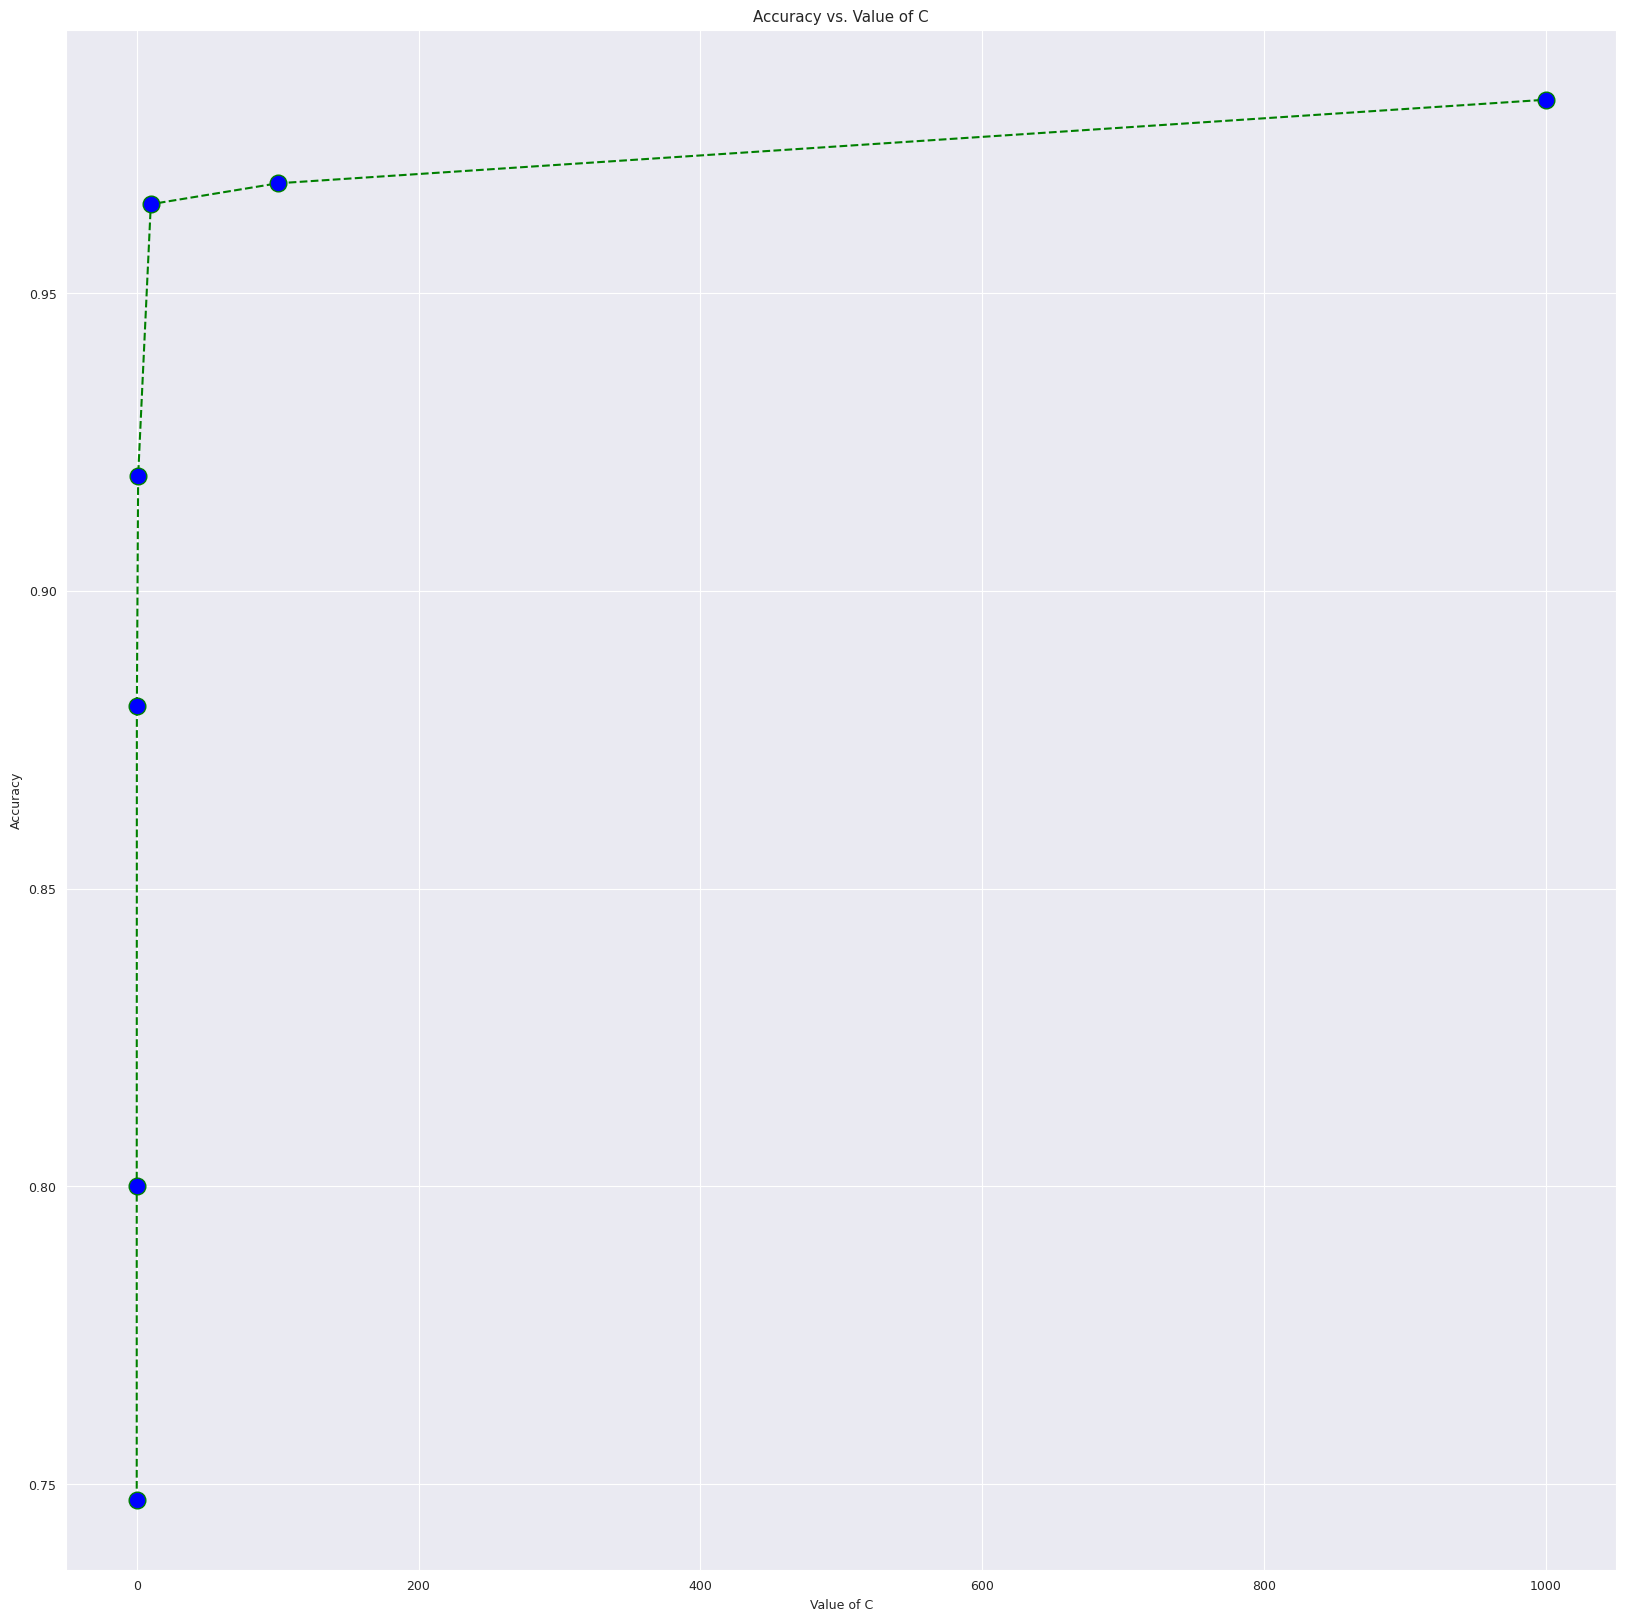

In [ ]:
ax =plt.figure(figsize=(20,20))
plt.plot(C_param_range,accuracy,color='green', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=12)
plt.title('Accuracy vs. Value of C')
plt.xlabel('Value of C')
plt.ylabel('Accuracy')

In [ ]:
C_prange = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
accuracy = []

for i in C_prange:

    train, test = train_test_split(data, test_size = i,random_state = 13)
    features = list(data.columns[1:32])
    X = data[features]
    y =data['Target']
    X_train = train[features]
    y_train = train['Target']
    X_test = test[features]
    y_test = test['Target']
    logmodel = LogisticRegression(C=100)
    logmodel.fit(X_train,y_train)
    pred = logmodel.predict(X_test)
    model_accuracy = metrics.accuracy_score(y_test,pred)
    accuracy.append(model_accuracy)

Text(0, 0.5, 'Accuracy')

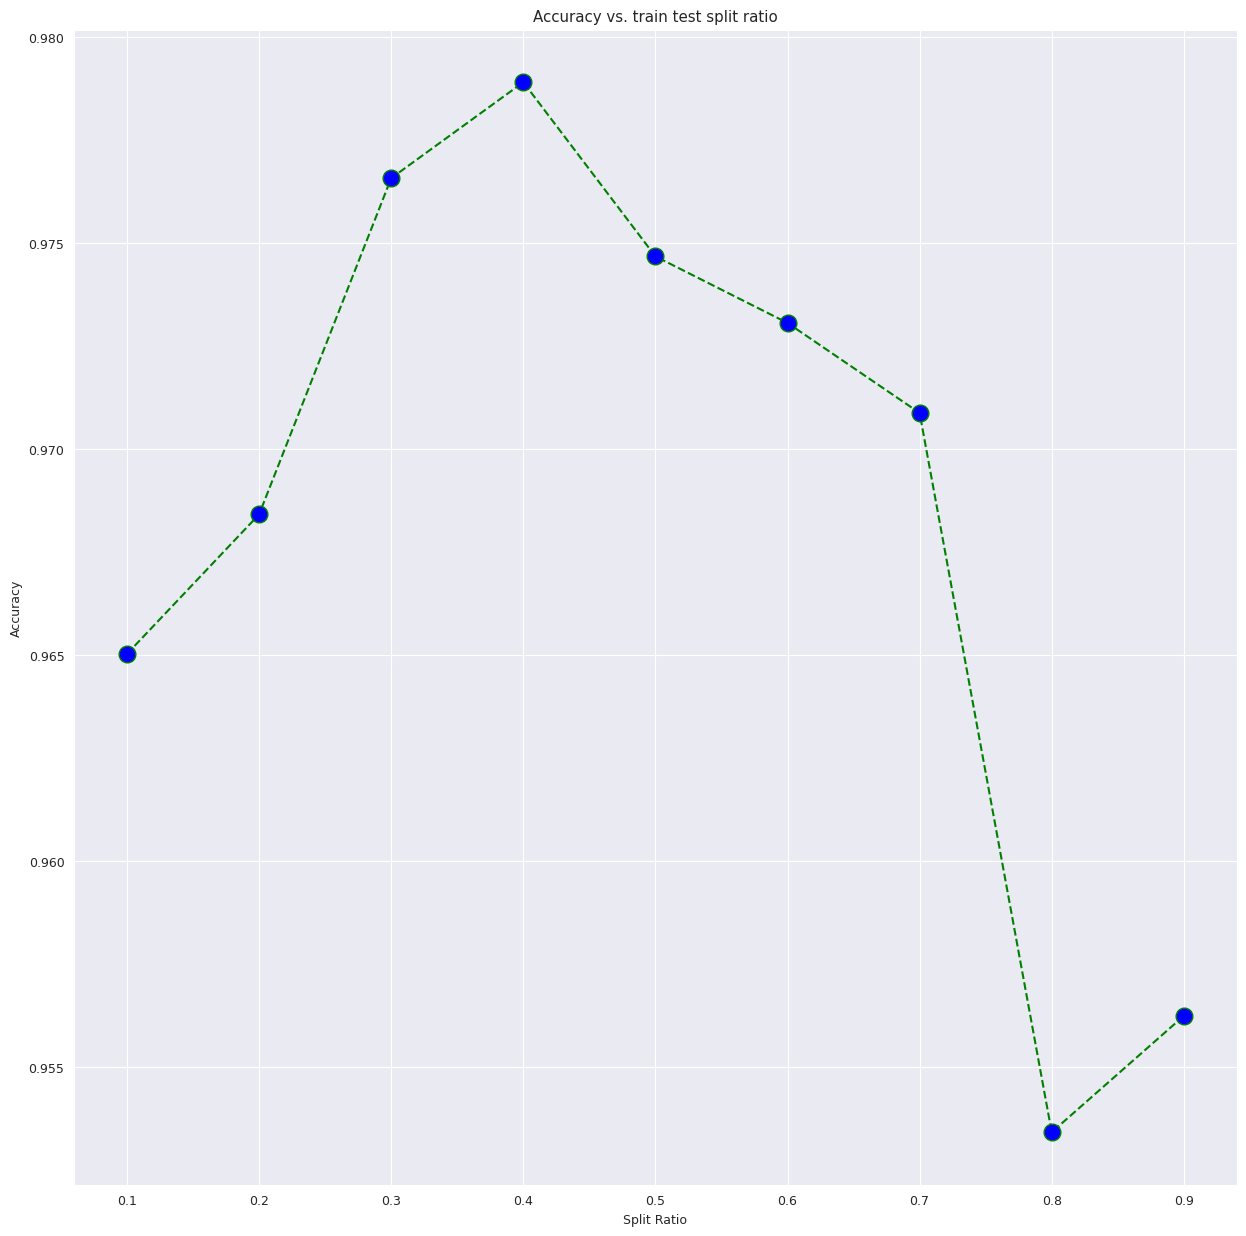

In [ ]:
ax =plt.figure(figsize=(15,15))
plt.plot(C_prange,accuracy,color='green', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=12)
plt.title('Accuracy vs. train test split ratio')
plt.xlabel('Split Ratio')
plt.ylabel('Accuracy')

##Performance of model after parameter tuning.

In [ ]:
train, test = train_test_split(data, test_size = 0.2, random_state= 24)
features = list(data.columns[1:32])
X = data[features]
y =data['Target']
X_train = train[features]
y_train = train['Target']
X_test = test[features]
y_test = test['Target']
logmodel = LogisticRegression(C=100)
logmodel.fit(X_train,y_train)
pred = logmodel.predict(X_test)
model_accuracy = metrics.accuracy_score(y_test,pred)
cm = confusion_matrix(y_test,pred)
print(confusion_matrix(y_test,pred))

[[143   0]
 [  2 140]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


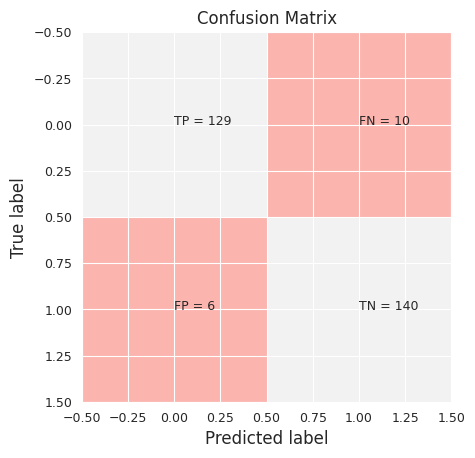

In [ ]:
#sns.set_style('white')
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Genuine','Imposter'],yticklabels=['Genuine','Imposter']),
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
#classNames = ['Genuine','Imposter']
plt.title('Confusion Matrix',fontsize = 12)
plt.ylabel('True label',fontsize=12)
plt.xlabel('Predicted label',fontsize=12)
#tick_marks = np.arange(len(classNames))
#plt.xticks(tick_marks, classNames,fontsize=9)
#plt.yticks(tick_marks, classNames,fontsize=9)
s = [['TP','FN'], ['FP', 'TN']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Area under curve:  0.9842047930283225


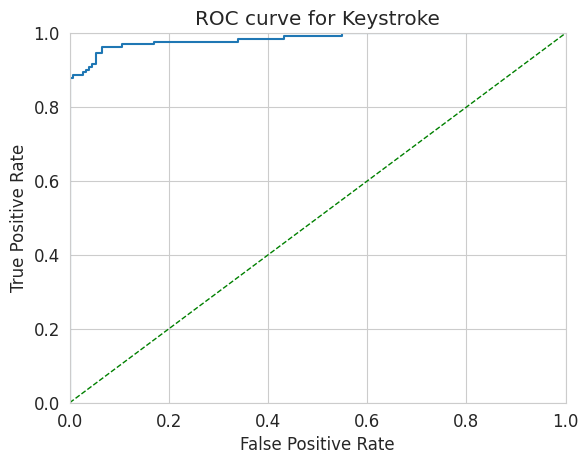

In [ ]:
probs = logmodel.predict_proba(X_test)
preds = probs[:,0]
fpr, tpr,threshold= metrics.roc_curve(y_test, preds,pos_label='Genuine')
plt.figure()
lw = 1
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Keystroke')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
roc_auc= metrics.auc(fpr,tpr)
print("Area under curve: " ,roc_auc)

In [ ]:
print("Accuracy of Model is: ",model_accuracy*100)
print()
print("Mis-Classification Rate of Model is: ",1 - model_accuracy)
print()
print("Area Under Curve: ",roc_auc)

Accuracy of Model is:  94.38596491228071

Mis-Classification Rate of Model is:  0.056140350877192935

Area Under Curve:  0.9842047930283225


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

     Genuine       0.96      0.96      0.96       639
    Imposter       0.96      0.96      0.96       641

    accuracy                           0.96      1280
   macro avg       0.96      0.96      0.96      1280
weighted avg       0.96      0.96      0.96      1280

